In [1]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

tokenizer = info.features['text'].encoder

In [8]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_data, test_data = dataset['train'], dataset['test'], 

train_dataset = train_data.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [3]:
import tensorflow as tf
import numpy as np

batch_size = 1
timesteps = 20
features = 16
lstm_dim = 8

print(f'batch_size: {batch_size}')
print(f'timesteps (sequence length): {timesteps}')
print(f'features (embedding size): {features}')
print(f'lstm output units: {lstm_dim}')

random_input = np.random.rand(batch_size,timesteps,features)
print(f'shape of input array: {random_input.shape}')

lstm = tf.keras.layers.LSTM(lstm_dim)
result = lstm(random_input)
print(f'shape of lstm output(return_sequences=False): {result.shape}')

lstm_rs = tf.keras.layers.LSTM(lstm_dim, return_sequences=True)
result = lstm_rs(random_input)
print(f'shape of lstm output(return_sequences=True): {result.shape}')

batch_size: 1
timesteps (sequence length): 20
features (embedding size): 16
lstm output units: 8
shape of input array: (1, 20, 16)
shape of lstm output(return_sequences=False): (1, 8)
shape of lstm output(return_sequences=True): (1, 20, 8)


In [9]:
embedding_dim = 16
lstm1_dim = 16
lstm2_dim = 16
dense_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          130960    
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 32)         4224      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 142,001
Trainable params: 142,001
Non-tr

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5
98/98 [==============================] - 576s 6s/step - loss: 0.6158 - accuracy: 0.6405 - val_loss: 0.4482 - val_accuracy: 0.8048
Epoch 2/5
98/98 [==============================] - 561s 6s/step - loss: 0.3568 - accuracy: 0.8563 - val_loss: 0.4101 - val_accuracy: 0.8227
Epoch 3/5
98/98 [==============================] - 581s 6s/step - loss: 0.2889 - accuracy: 0.8898 - val_loss: 0.3946 - val_accuracy: 0.8500
Epoch 4/5
98/98 [==============================] - 574s 6s/step - loss: 0.2145 - accuracy: 0.9243 - val_loss: 0.4435 - val_accuracy: 0.8277
Epoch 5/5
98/98 [==============================] - 569s 6s/step - loss: 0.1773 - accuracy: 0.9394 - val_loss: 0.4596 - val_accuracy: 0.8358


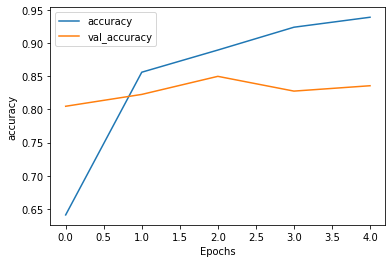

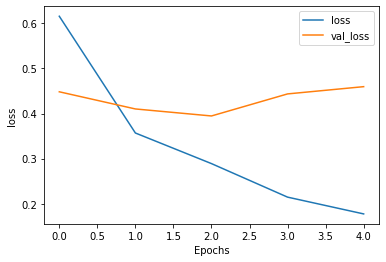

In [13]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")